# CMSE 802 Pre-class assignment: Fast Fourier Transform (FFT)
## Date: 10/19/2018
## Due: 10/22/2018; 10:30 PM

### The goal of this assignment is to learn Fast Fourier Transform and use Python library of FFT.

---
### Your name: Boyao Zhu

### 1. Fourier Series and Fourier Transform

In this pre-class assignment we will try to get some intuition about a really cool mathematical tool called the Fourier Transform. Fourier series and Fourier transform are named after J-B Joseph Fourier who developed the mathematical work for solving the heat equation. 

Here, we will use two videos to quickly go over Fourier Series and the Fourier Transform. Please watch the two videos below.


Another really good tutorial can be found here:

https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

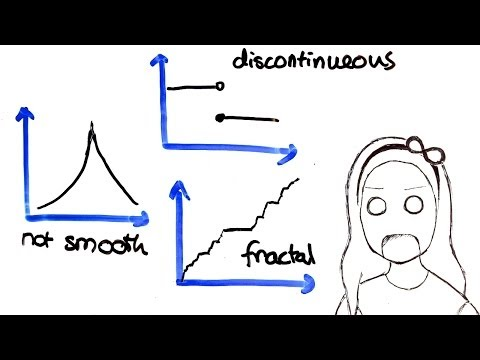

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("kP02nBNtjrU",width=640,height=360)

**Question 1: ** According to this video, what is the Fourier Series used for? 

**Your answer: ** To approximate smooth curved functions

**Question 2: ** What mathematical technique is used to combine the simple functions needed to estimate an interval? 

**Your answer: ** linear combination

** Task 1. Now, Let's do some programming to re-do the Fourier series calculation in the video. ** We will use scipy for numerical integration.

A function can be rewritten in a Fourier series as

$$f(x) = a_0 + \sum_{n=0}^\infty \bigg( a_n \cos (nx) + b_n \sin (nx) \bigg),$$

where 
$$ a_0 = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) dx$$

$$ a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos (nx) dx ~~\text{for}~~ n = 1, 2, ..., \infty$$

$$ b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin (nx) dx ~~\text{for}~~ n = 1, 2, ..., \infty.$$

** Problem setup: ** As in the video, let's calculate the coefficients of the Fourier series for 

$$ f(x) = x^3 ,$$

up to $n=20$.

** Fill the blank, and complete the code below. **


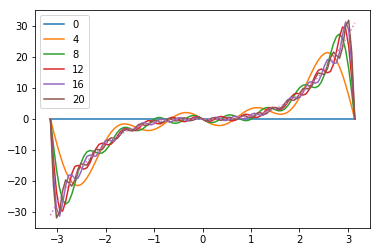

In [22]:
# load moadules
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt


pi = np.pi

# calculate the Fourier coefficients
a_c = []
b_c = []
n_hmc = 21
for n in range(n_hmc):
    
    # calculate the a_n coefficient by integration
    x1 = lambda x: x**3*np.cos(n*x)
    r1, err = integrate.quad(x1, -pi, pi)
 
    # calculate the b_n coefficient following the example above
    # your code:
    x2 = lambda x: x**3*np.sin(n*x)
    r2, er2 = integrate.quad(x2, -pi, pi)

    if n == 0:
        a_c.append(r1/2/pi)   # <== fill the blank
        b_c.append(r2/2/pi)   # <== fill the blank
    else:
        a_c.append(r1/pi)   # <== fill the blank
        b_c.append(r2/pi)   # <== fill the blank
        

# obtain the Fourier series and plot the result
Xp = np.linspace(-pi,pi,101)
FS = np.zeros(101)
for n in range(n_hmc):
    
    FS = FS + a_c[n]*np.cos(n*Xp) + b_c[n]*np.sin(n*Xp)   # <== fill the blank 
    
    if n%4 == 0:
        plt.plot(Xp,FS,label=n)


plt.plot(Xp,Xp**3,':')
plt.legend()
plt.show()


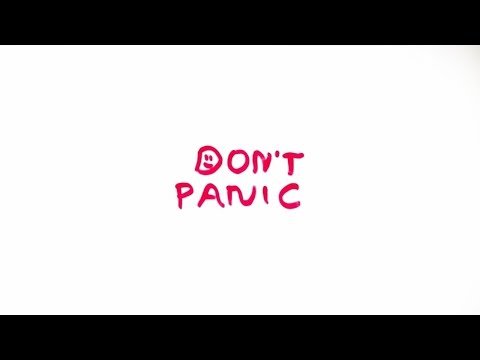

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo("Xxut2PN-V8Q",width=640,height=360)

**Question 3:** A Fourier Series is used to estimate an finite interval.  What interval is be estimated by the Fourier Transform? 

**Your answer: ** infinity

---
### 2. Creating an Example Periodic Signal

Up to now, we may know that Fourier transform (for signal processing) is to transform a function in the time domain to a function in the frequency domain. In physics, it is to transform a function in the real space to the reciprocal space. The original function and its Fourier tranform are actually two represenations of the same thing.   

Let's play with some math of Fourier transform. Let's create an example "signal" which we can model using a Fourier Series.   

Let's start by creating an artificial, **Periodic** function.  A Periodic function is one that repeats (like a sine wave).  We will combine two sine waves and a little noise (error).  

$$F(x) = A1\cdot\sin(f1\cdot x) + A2\cdot\sin(f2\cdot x) + e$$ 
$$A1, ~A2 = \text{Amplitudes of first and second} \sin \text{waves}$$
$$f1, ~f2 = \text{Frequency of first and second} \sin \text{waves}$$
$$e = \text{random error}$$

**A.** The first step is to create a vector of evenly spaced values from zero to 2$\pi$. To do this we will use the numpy linspace command.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

N = 300 #number of samples

# Make a vector of evely spaced valuse from zero to 2*pi
x = np.linspace(0,2*np.pi,N)


**B.** Next we make the first $\sin$ function.  Lets have a frequency of 2 and an amplitude of 10.

$$10\sin(2x)$$

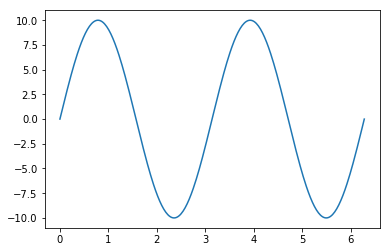

In [23]:
# Create sine wave one
A1 = 10
f1 = 2
y1 = A1*np.sin(f1*x)

plt.plot(x,y1)

**C.** Make the second $\sin$ function have a frequency of 20 and an amplitude of 3.

$$3\sin(20x)$$

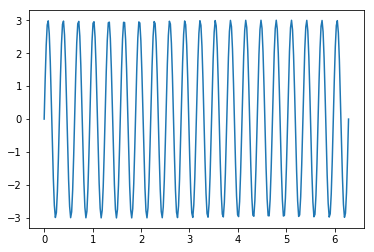

In [24]:
# Create sine wave two
A2 = 3
f2 = 20
y2 = A2*np.sin(f2*x)

plt.plot(x,y2)

**D.** Now we can add the two waves together and get a combined signal:
    
$$10\sin(2x)+3\sin(20x)$$

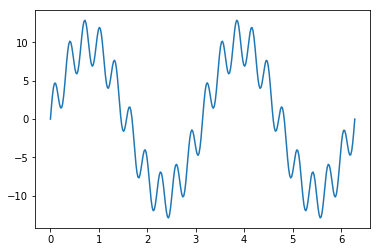

In [25]:
plt.plot(x,y1+y2)

**E.** Finally, lets create some random noise between 0 and 2 and add it to the signal to make it more "natural".

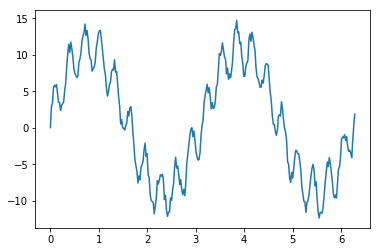

In [34]:
e = np.random.rand(N)*2

plt.plot(x,y1+y2+e)

---
### 3. Applying the Fast Fourier Transform

Now we have a periodic (repeating) signal.  Let's transform it to the frequency domain by applying the Fast Fourier Transform (FFT). You can call the FFT function inside of numpy as shown below.  The FFT function returns a vector of imaginary numbers the same size as the input vector.

In [35]:
PyFs = np.fft.fft(y1+y2+e)

print(PyFs)

[ 2.96162226e+02+0.00000000e+00j  2.67317251e+00-4.57024129e+00j
  3.81894559e+01-1.50733445e+03j -5.93417692e+00+6.30149876e+00j
  8.54835190e-01+1.20865648e+01j  3.38159677e+00+1.46156938e+00j
 -1.55242869e+00-4.72120681e+00j  7.66935698e+00+3.71482078e+00j
 -4.03385480e+00+1.42230139e+00j  8.10320197e+00-3.01346955e+00j
 -5.26812003e+00-6.07400016e+00j  3.76152224e+00+1.09263993e+00j
  1.42706837e+00-5.24483771e+00j  1.96403389e+01+3.47222320e+00j
 -7.13766412e+00+3.39477604e-01j  4.68922238e+00+9.14839459e-01j
  6.48400924e+00-6.71404361e+00j -5.86808143e+00-6.18088266e+00j
 -7.11081778e+00-1.29288387e+01j -2.29980883e+00-2.78513108e+01j
  9.03829371e+01-4.40637296e+02j -8.19866112e+00+3.54000273e+01j
 -1.76489199e+00+1.87084459e+01j  1.64488159e+00+2.30325582e+01j
 -1.29998217e-02+1.76490043e+01j -1.12771717e+01+1.02149991e+01j
  4.34242950e+00+8.77594809e+00j -1.73950927e+01+2.99259194e+00j
 -9.08500815e+00+8.58381593e+00j -3.28483769e+00+1.88619455e+01j
  8.76364777e-01+4.361861

The above numbers represent the contributions of each frequency to the original signal.  For each item in the vector there is a real and imaginary component (the imaginary component has a "j" next to it).   We can just ignore the imaginary component for now by taking the absolute value of the frequency space and plot the result:

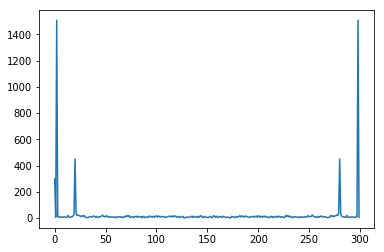

In [36]:
plt.plot(abs(PyFs))

This graph shows the contribution of each frequency to the original signal.  As you can see there are four spikes in the graph and the graph is symmetric.  Typically we often choose to just plot half of the space to see more detail. We can do this as follows:

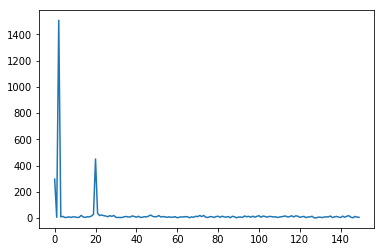

In [37]:
plt.plot(abs(PyFs[:int(N/2)]))

We can see two spikes in the frequency space that represent the frequencies of our two sin wave input signals.  One has an frequency of 2 and the second has a frequency of 20. 

**Question 4:**  What Happens to the Frequency domain if you increase the contribution of the noise in the original signal? 

**Your answer: ** some area that is looking smooth become more vibrating 

**Question 5:**  Modify the code in sections 1 to change the input signals so that f1=10 and f2 = 100. What happens to the spikes in the frequency domain?

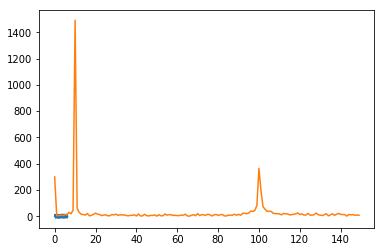

In [45]:
## modified code:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

N = 300 #number of samples

# Make a vector of evely spaced valuse from zero to 2*pi
x = np.linspace(0,2*np.pi,N)

A1 = 10
f1 = 10
y1 = A1*np.sin(f1*x)

A2 = 3
f2 = 100
y2 = A2*np.sin(f2*x)

#plt.plot(x,y1+y2)  # first plot

e = np.random.rand(N)*2
plt.plot(x,y1+y2+e)  # second plot

PyFs = np.fft.fft(y1+y2+e)

#plt.plot(abs(PyFs)) # third plot

plt.plot(abs(PyFs[:int(N/2)]))   # last plot

**Your answer: **

---

### 4. Inverse Fast Fourier Transform
One of the neat things about an FFT is that it is reversible.  We can take the Frequency space as an input (i.e. a vector of complex numbers) and return a signal using the inverse Fast Fourier Transform (ifft).  Lets try to do that now.  I am going to create a new frequency vector with a spikes at 2 and 20 (note I do this twice to maintain the symmetry).

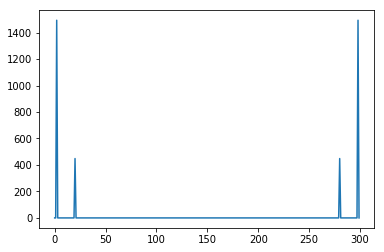

In [46]:
Fs2 = np.zeros(N)
Fs2[2] = 1493
Fs2[-2] = 1493
Fs2[20] = 448.4
Fs2[-20] = 448.4
plt.plot(Fs2)

Now we use the ifft function (inverse Fast Fourier Transform) to generate a periodic function similar to our original one (without the noise).  Note we will get a warning because we didn't include an imaginary component which we can actually ignore for these types of problems:

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


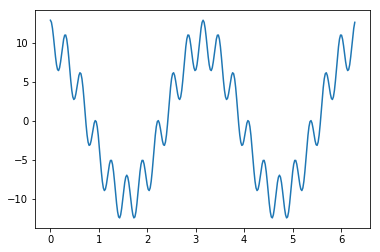

In [47]:
yy = np.fft.ifft(Fs2)
plt.plot(x,yy)

**Question 6: ** Compare to the one you created earlier, how does the signal function look like? 

**Your answer: ** the pikes appear 10 and 100


---
### 5. Discrete Fourier Transform.

What under the hood of the fast Fourier transform is the discrete Fourier transform. As in the second video, instead of integration over a continuous function, a quick way is to use the sum of discrete values to replace the integration. For example,

$$ F(q) = \int_{-\infty}^{\infty} f(t) \exp(-2\pi i q t) dt ~~\Longrightarrow~~ F_m = \sum_{k=0}^{N-1} f_k \exp(-2\pi i m k /N)$$

Note that $F_m$ and $f_k$ are two vectors, each of which contains N number of discrete values.

** Complete the code below for discrete Fourier transform. Compare the result to that from np.fft.**

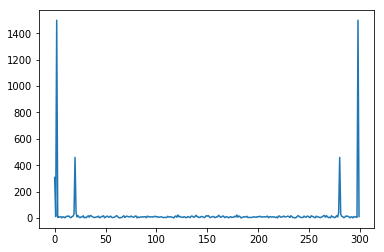

In [21]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

N = 300
Xp = np.linspace(0,2*pi,N)


f = 10*np.sin(2*Xp) + 3*np.sin(20*Xp) + np.random.rand(N)*2

F = []
Amp = []
for m in range(N): 
    V = 0+0j
    for k in range(N):  # <== fill the blank
        V = V + f[k]*np.exp(-2*pi*m*k/N*1j)  # <== fill the blank
        
    F.append(V)
    Amp.append(abs(F[m]))
        
    
plt.plot(Amp)

plt.show()

**Your answer: **

### Congratulations, you're done with your first pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20181022, and upload it there.

**Please keep a copy the code. We will reuse the code in the class.**

See you in class!